In [78]:
# Import all the needed modules
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from scipy.optimize import minimize
import tqdm
from time import time
# Setup pyplot's figure params
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
rcParams["figure.dpi"] = 100
img_dir = "./images/"

# define accuracy
eps = 0.001

In [79]:
# Class for function
class Function:
    def __init__(self, name, func, range_):
        self.name = name
        self.range_ = range_
        self.func = func
    
    def calc(self, x):
        return self.func(x)

    
def cubed_func(x):
    return x**3

def abs_func(x):
    return abs(x - 0.2)

def sin_func(x):
    return x*np.sin(1/x)

# Function for plotting the result
def plot_res(results, flist):
    fig, axes = plt.subplots(1, 3)
    for res, ax, f in zip(results, axes, flist):
        ax.grid()
        ax.set_xlim(*f.range_)
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.set_title(f"{res[0]} function")
        ax.axhline(linewidth=1, c="black")
        x = np.linspace(0.001, 1, 100)
        ax.plot(x, f.calc(x))
        ax.plot([res[1]], [f.calc(res[1])], "r.", markersize=12)

In [80]:
# Implementation of exhaustive search
def exhaustive_search(func, range_):
    a, b = range_
    n = int((b - a) / eps) + 1
    x_min = np.inf
    f_min = np.inf
    
    const_mult = (b - a) / n
    
    # for each x_k calculate the value of a function
    for k in range(n):
        x_k = a + k * const_mult
        f_k = func.calc(x_k)
        # update minimal value of a function
        if f_k < f_min:
            x_min = x_k
            f_min = f_k
            
    return func.name, x_min, n, n

# Implementation of dichotomy method
def dichotomy(func, range_):
        a, b = range_
        delta = eps / 2
        
        # lambda function for calcualting boundaries
        get_range = lambda a, b: (0.5*(a+b-delta), 0.5*(a+b+delta))
        
        n_iter = n_calls = 0
        while abs(a - b) >= eps:
            n_iter += 1
            x_1, x_2 = get_range(a, b)
            f_1 = func.calc(x_1)
            f_2 = func.calc(x_2)
            n_calls += 2
            
            # update boundaries
            if f_1 <= f_2:
                b = x_2
            else:
                a = x_1
               
        x_min = a + delta
        return func.name, x_min, n_iter, n_calls
    
# Implementation of golden section method
def golden_section(func, range_):
        a, b = range_
        n_iter = n_calls = 0
        
        # define lambda function for computing boundaries
        ratio = (3-np.sqrt(5))/2
        get_x_1 = lambda a, b: a + ratio*(b - a)
        get_x_2 = lambda a, b: b - ratio*(b - a)
        
        # initiate first values of x and function of x
        x_1 = get_x_1(a, b)
        x_2 = get_x_2(a, b)
        
        f_1 = func.calc(x_1)
        f_2 = func.calc(x_2)
        n_calls += 2
        
        while abs(a - b) >= eps:
            n_calls += 1
            n_iter += 1
            # update boundaries
            if f_1 <= f_2:
                b = x_2
                x_2 = x_1
                f_2 = f_1
                x_1 = get_x_1(a, b)
                f_1 = func.calc(x_1)
            else:
                a = x_1
                x_1 = x_2
                f_1 = f_2
                x_2 = get_x_2(a, b)
                f_2 = func.calc(x_2)
               
        x_min = a + eps / 2
        return func.name, x_min, n_iter, n_calls

# create objects for a functions
cubic_function = Function("Cubic", cubed_func, [0, 1])
abs_function = Function("Abs", abs_func, [0, 1])
sin_function = Function("Sin", sin_func, [0.001, 1])

func_list = [cubic_function, abs_function, sin_function]

Exhaustive search
Cubic x_min: 0.00, n_iter: 1001, n_func_calls: 1001 
Abs x_min: 0.20, n_iter: 1001, n_func_calls: 1001 
Sin x_min: 0.22, n_iter: 991, n_func_calls: 991 


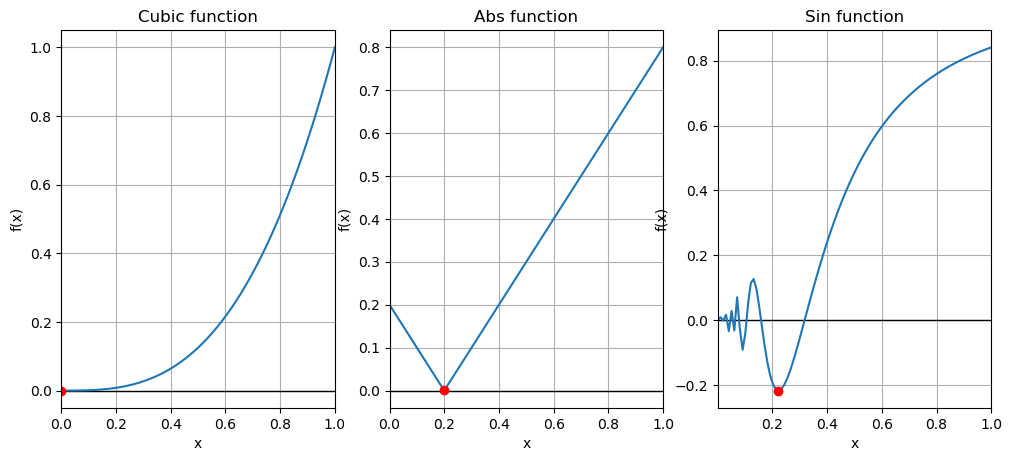

In [81]:
# run function and gather data
print("Exhaustive search")
cub_res = exhaustive_search(cubic_function, [0, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % cub_res)
abs_res = exhaustive_search(abs_function, [0, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % abs_res)
sin_res = exhaustive_search(sin_function, [0.01, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % sin_res )

# plot the results
plot_res([cub_res, abs_res, sin_res], func_list)

Dichotomy search
Cubic x_min: 0.00, n_iter: 11, n_func_calls: 22 
Abs x_min: 0.20, n_iter: 11, n_func_calls: 22 
Sin x_min: 0.22, n_iter: 11, n_func_calls: 22 


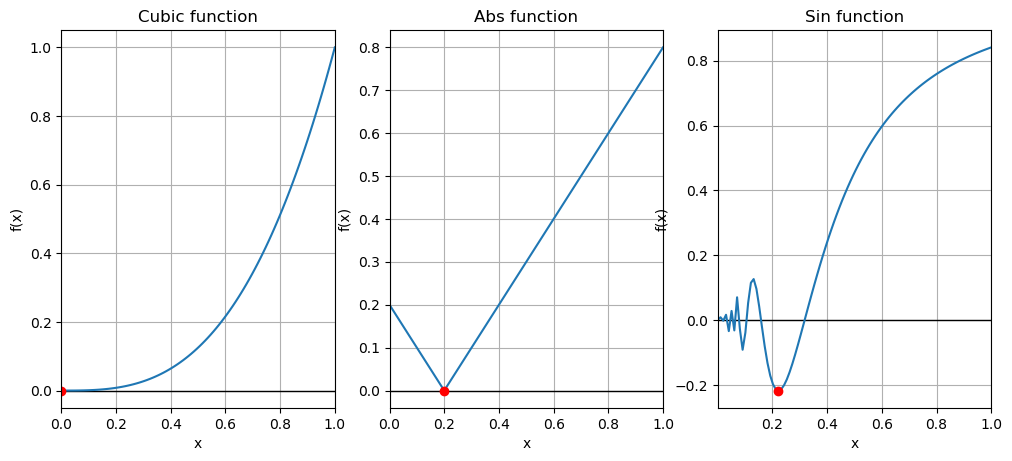

In [82]:
# run function and gather data
print("Dichotomy search")
cub_res = dichotomy(cubic_function, [0, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % cub_res)
abs_res = dichotomy(abs_function, [0, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % abs_res)
sin_res = dichotomy(sin_function, [0.01, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % sin_res )

# plot the results
plot_res([cub_res, abs_res, sin_res], func_list)

Golden section search
Cubic x_min: 0.00, n_iter: 15, n_func_calls: 17 
Abs x_min: 0.20, n_iter: 15, n_func_calls: 17 
Sin x_min: 0.22, n_iter: 15, n_func_calls: 17 


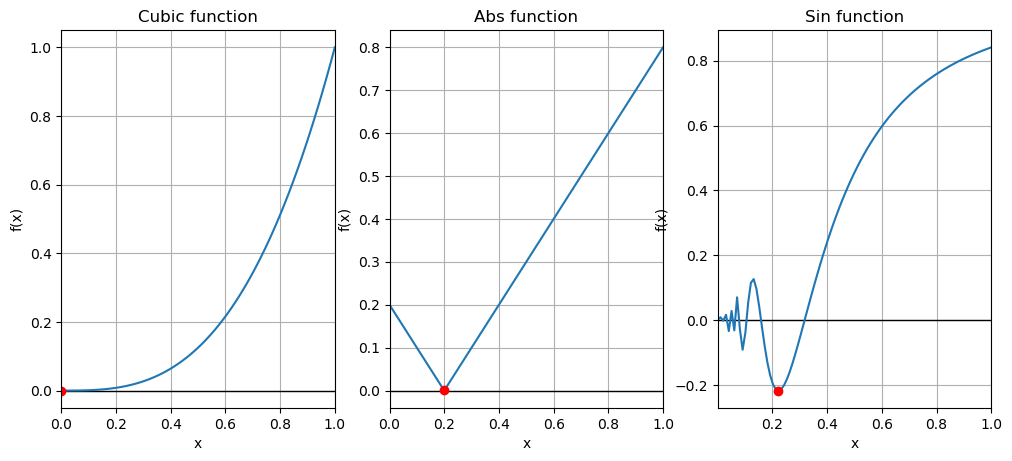

In [83]:
# run function and gather data
print("Golden section search")
cub_res = golden_section(cubic_function, [0, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % cub_res)
abs_res = golden_section(abs_function, [0, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % abs_res)
sin_res = golden_section(sin_function, [0.01, 1])
print( "%s x_min: %1.2f, n_iter: %d, n_func_calls: %d " % sin_res )

# plot the results
plot_res([cub_res, abs_res, sin_res], func_list)

In [84]:
# linear function for regression
def linear(x, a, b):
    return a*x+b

# rational function for regression
def rational(x, a, b):
    return a/(1+b*x)

# function for computing mean square error
def mse_loss(x, y, x_args, func):
    a, b = x
    return np.sum((func(x_args, a, b)-y)**2)

# function for generating random noised linear data
def generate_data(a, b, k=100):
    y_k = [ a*i/k+b+np.random.normal(0, 0.1) for i in range(k) ]
    return np.array(y_k)

# function for plotting the results of an approximation
def plot_opt_res(results, flist, names):
    x = np.linspace(0.001, 1, 100)
    fig, axes = plt.subplots(1, 2)
    for res, ax, f, n in zip(results, axes, flist, names):
        ax.grid()
        ax.set_xlim(0, 1)
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.set_title(f"{n} regression")
        ax.axhline(linewidth=1, c="black")
        if hasattr(res, "x"):
            ax.plot(x, f(x, *res.x), c="red", label="regression (%.4f, %.4f)" % tuple(res.x))
        else:
            ax.plot(x, f(x, *res), c="red", label="regression (%.4f, %.4f)" % tuple(res))
        ax.plot(x, y, c="b", label=f"data (%.4f, %.4f)" % (alpha, betta))
        ax.legend(loc="lower left")

# function of exhaustive search for 2dim case
def exhaustive_search_2D(func, range_, args):
    a, b = range_
    n = int((b - a) / eps) + 1

    f_min = np.inf
    
    const_mult = (b - a) / n
    
    # compute all combinations of x_i and x_j
    # and find minimal f(x_i, x_j)
    for i in tqdm.tqdm_notebook(range(n)):
        x1 = a + i * const_mult    
        for j in range(n):
            x2 = a + j * const_mult
            params = (x1, x2)
            f = func(params, *args)
            if f < f_min:
                x1_min = x1
                x2_min = x2
                f_min = f
            
    return x1_min, x2_min
 
# implementation of a dichotomy method for a gauss optimization
def dichotomy_gauss(func, x_1_fixed, x_2_fixed, range_, args):
    a, b = range_
    delta = eps / 2
    get_range = lambda a, b: (0.5*(a+b-delta), 0.5*(a+b+delta))

    while abs(a - b) >= eps:
        x_1, x_2 = get_range(a, b)
        
        # if x1 is fixed and x2 is optimized
        if x_1_fixed:
            f_1 = func((x_1_fixed, x_1), *args)
            f_2 = func((x_1_fixed, x_2), *args)
        # if x2 is fixed and x1 is optimized
        else:
            f_1 = func((x_1, x_2_fixed), *args)
            f_2 = func((x_2, x_2_fixed), *args)
            
        if f_1 <= f_2:
            b = x_2
        else:
            a = x_1

    x_min = a + delta
    return x_min
    
# Gauss method for optimizing 2d function
def gauss_2D(func, range_, args):
    a, b = range_
    
    # itinialize guess and f(guess)
    x = np.random.uniform(size=(1, 2))[0]
    f_prev = func(x, *args)
    
    n_iter = n_calls = 0
    
    while True:
        n_iter += 1
        
        # fix x1 and optimize in respect to x2
        x_1_fixed = x[0]
        x_2_min = dichotomy_gauss(func, x_1_fixed, None, range_, args)
        
        # update x2
        x[1] = x_2_min
        
        # check exit condition
        if abs(func(x, *args) - f_prev) < eps:
            break
        else:
            f_prev = func(x, *args)
        
        n_calls += 1
        
        # fix x2 and optimize in respect to x1
        x_2_fixed = x[1]
        x_1_min = dichotomy_gauss(func, None, x_2_fixed, range_, args)
        
        # update x2
        x[0] = x_1_min
        
        # check exit condition
        if abs(func(x, *args) - f_prev) < eps:
            break
        else:
            f_prev = func(x, *args)
        
        n_calls += 1
                
    return x
            
# generate random alpha and betta
alpha = np.random.uniform()
betta = np.random.uniform()

# generate noised linear data
y = generate_data(alpha, betta)

init_guess = np.random.uniform(size=(1, 2))

# generate x axes data
x_data = np.linspace(0, 1, 100)

# find alpha and betta using Nelder-Mead method 
lin_nm = minimize(mse_loss, init_guess, args=(y, x_data, linear), method="Nelder-Mead", tol=eps)
rat_nm = minimize(mse_loss, init_guess, args=(y, x_data, rational), method="Nelder-Mead", tol=eps)

# find alpha and betta using multi-variable Exhaustive search
lin_ex = exhaustive_search_2D( mse_loss, [0, 1], args=(y, x_data, linear))
rat_ex = exhaustive_search_2D( mse_loss, [-1, 1], args=(y, x_data, rational))

# find alpha and betta using Gauss method
gaus_lin = gauss_2D(mse_loss, [0, 1], args=(y, x_data, linear))
gaus_rat = gauss_2D(mse_loss, [-1, 1], args=(y, x_data, rational))

/home/rami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


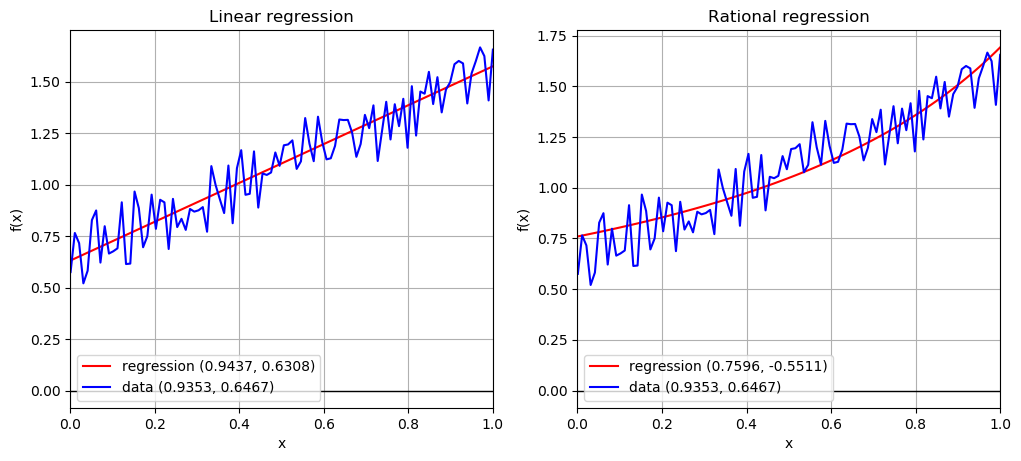

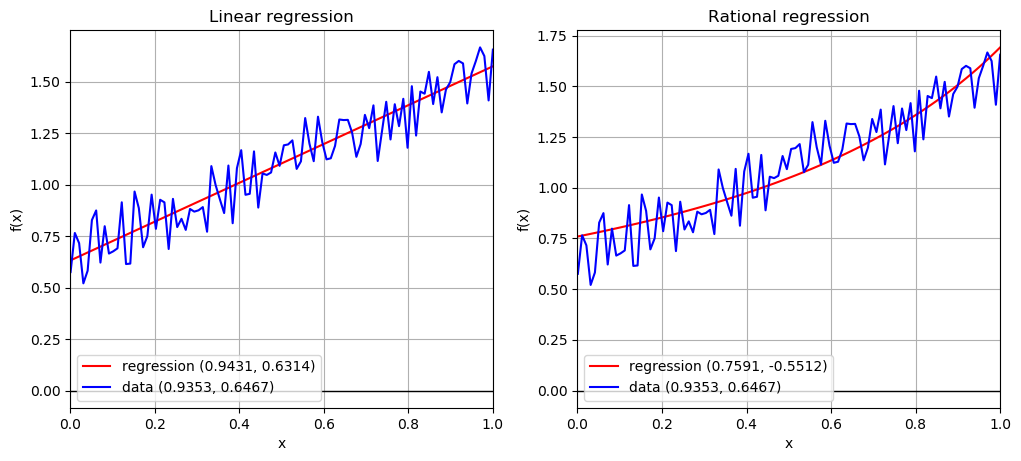

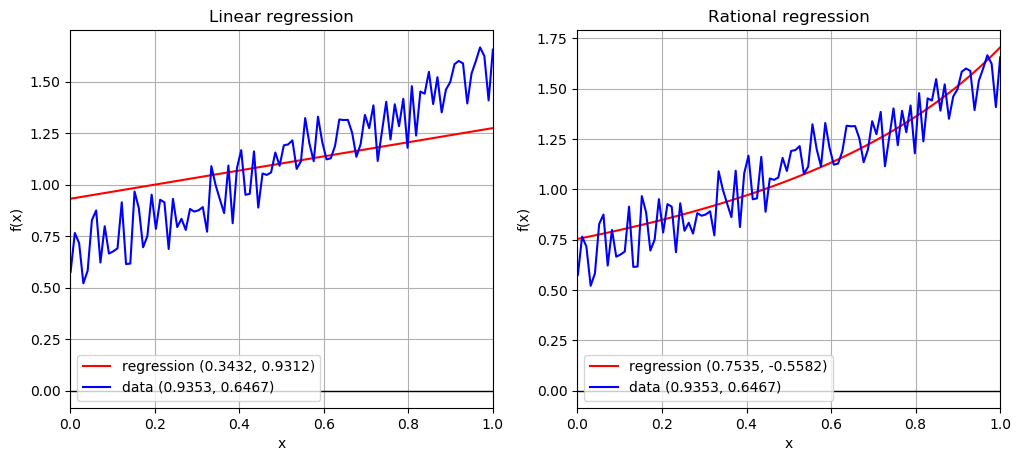

In [85]:
# plot the results
plot_opt_res([lin_nm, rat_nm], [linear, rational], ["Linear", "Rational"])
plot_opt_res([lin_ex, rat_ex], [linear, rational], ["Linear", "Rational"])
plot_opt_res([gaus_lin, gaus_rat], [linear, rational], ["Linear", "Rational"])

In [86]:
rat_nm

 final_simplex: (array([[ 0.7595619 , -0.55113061],
       [ 0.75881485, -0.55189001],
       [ 0.75977836, -0.55153451]]), array([1.21054482, 1.21055741, 1.21063917]))
           fun: 1.2105448218085901
       message: 'Optimization terminated successfully.'
          nfev: 71
           nit: 38
        status: 0
       success: True
             x: array([ 0.7595619 , -0.55113061])

In [87]:
lin_nm

 final_simplex: (array([[0.94368717, 0.63079006],
       [0.94324403, 0.63127271],
       [0.94454539, 0.63038122]]), array([0.97196605, 0.9719695 , 0.97197076]))
           fun: 0.9719660541122417
       message: 'Optimization terminated successfully.'
          nfev: 56
           nit: 29
        status: 0
       success: True
             x: array([0.94368717, 0.63079006])